This example was taken from the book **The Essence of Chaos** by *Edward Lorenz*. 

$$\frac{dX}{dt} = U,$$

$$\frac{dY}{dt} = V,$$

$$\frac{dZ}{dt} = W,$$

$$\frac{dU}{dt} = -FH_X - cU,$$

$$\frac{dV}{dt} = -FH_Y - cV,$$

$$\frac{dW}{dt} = -g + F - cW.$$

In [25]:
using Plots
gr()

Plots.GRBackend()

In [37]:
a = 0.25
b = 0.5
q = (2π)/4.0
p = (2π)/10.0

H_test(x,y) = -a*x - b*cos(p*x)*cos(q*y) 

H_test (generic function with 1 method)

In [44]:
function generate_slope(G::Function, xx_range, yy_range)
    
    slope = zeros(length(x_range), length(y_range))
    
    for i in 1:length(xx_range)
        for j in 1:length(xx_range)
            
            slope[i,j] = G(xx_range[i], yy_range[j])
            
        end
    end
    
    slope
    
end

generate_slope (generic function with 2 methods)

In [45]:
x_range = 0:0.1:20
y_range = 0:0.1:20

0.0:0.1:20.0

In [46]:
sol = generate_slope(H_test, x_range, y_range)

201×201 Array{Float64,2}:
 -0.5       -0.493844  -0.475528  …  -0.475528  -0.493844  -0.5     
 -0.524013  -0.51787   -0.49959      -0.49959   -0.51787   -0.524013
 -0.546057  -0.53995   -0.521779     -0.521779  -0.53995   -0.546057
 -0.566144  -0.560097  -0.542105     -0.542105  -0.560097  -0.566144
 -0.584292  -0.578329  -0.560589     -0.560589  -0.578329  -0.584292
 -0.600528  -0.594674  -0.577254  …  -0.577254  -0.594674  -0.600528
 -0.614888  -0.609165  -0.592135     -0.592135  -0.609165  -0.614888
 -0.627414  -0.621844  -0.605271     -0.605271  -0.621844  -0.627414
 -0.638153  -0.632759  -0.616709     -0.616709  -0.632759  -0.638153
 -0.647164  -0.641966  -0.626502     -0.626502  -0.641966  -0.647164
 -0.654508  -0.649528  -0.63471   …  -0.63471   -0.649528  -0.654508
 -0.660257  -0.655513  -0.641401     -0.641401  -0.655513  -0.660257
 -0.664484  -0.659997  -0.646645     -0.646645  -0.659997  -0.664484
  ⋮                               ⋱                         ⋮       
 -5.1102

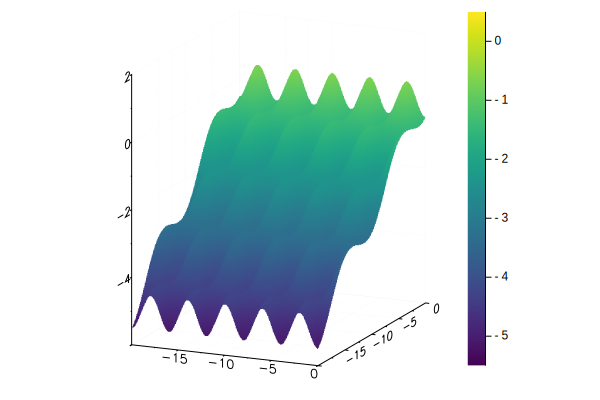

In [47]:
surface(-y_range, -x_range, sol, color=:viridis)

In [52]:
using DifferentialEquations

In [7]:
function runge_kutta_step_2(f::Function, x0, dt, F, H, c)
       
    k1 = f(x0, F, H, c) * dt
    k2 = f(x0 + k1/2, F, H, c) * dt
    k3 = f(x0 + k2/2, F, H, c) * dt
    k4 = f(x0 + k3, F, H, c) * dt
    x_new = x0 + (k1 + 2*k2 + 2*k3 + k4)/6
    
    return x_new
end

runge_kutta_step_2 (generic function with 1 method)

In [8]:
function runge_kutta_step(f::Function, x0, dt)
       
    k1 = f(x0) * dt
    k2 = f(x0 + k1/2) * dt
    k3 = f(x0 + k2/2) * dt
    k4 = f(x0 + k3) * dt
    x_new = x0 + (k1 + 2*k2 + 2*k3 + k4)/6
    
    return x_new
end

runge_kutta_step (generic function with 1 method)

In [54]:
dx(x0) = u0
dy(y0) = v0
dU(u0, F, H_x, c) = -F*H_x - c*u0
dV(v0, F, H_y, c) = -F*H_y - c*v0

dV (generic function with 1 method)

In [11]:
function ski_slope(x0, y0, u0, v0, n, dt)
    g = 9.81
    c = 0.5
    a = 0.25
    b = 0.5
    p = (2π)/10.0
    q = (2π)/4.0
   
    solution = zeros(n+1, 2)
    solution[1, 1] = x0
    solution[1,2] = y0
    
    for i in 2:n+1
        
        H = -a*x0 - b*cos(p*x0)*cos(q*y0) 
        H_x = -a + b*p*sin(p*x0)*cos(q*y0)
        H_xx = b*p^2 * cos(p*x0)*cos(q*y0)
        H_y = b*q*cos(p*x0)*sin(q*y0)
        H_yy = b*q^2 * cos(p*x0)*cos(q*y0)
        H_xy = -b*q*p*sin(p*x0)*sin(q*y0)
        
        F = (g + H_xx*u0^2 + 2*H_xy*u0*v0 + H_yy*v0^2)/(1 + H_x^2 + H_y^2)
        u_new = runge_kutta_step_2(dU, u0, dt, F, H_x, c)
        v_new = runge_kutta_step_2(dV, v0, dt, F, H_y, c)
        x_new = x0 + u0 * dt
        y_new = y0 + v0*dt
        
        solution[i, 1] = x_new
        solution[i, 2] = y_new
        
        x0 = copy(x_new)
        y0 = copy(y_new)
        u0 = copy(u_new)
        v0 = copy(v_new)
        
    end
    
    solution
    
end

ski_slope (generic function with 1 method)

### Example 1

Initial conditions: $x = 0.0$, $y = 0.5$, $U = 4.0$ and $V = 2.0$.

In [12]:
function various_sol_generator(N, x0, y0, u0, v0, n, dt, dy)
    solutions = Any[]
    
    for i in 1:N
        Δy = (i-1)*dy
        trayectory = ski_slope(x0, y0 + Δy, u0, v0, n, dt)
        push!(solutions, trayectory)
    end
    
    return solutions
end

various_sol_generator (generic function with 1 method)

In [13]:
function plot_several(A)
    
    plot(A[1][:,2], A[1][:,1], yflip=true, size =(300, 600), leg = false, grid = false)
    
    for i in 2:length(A)
        plot!(A[i][:,2], A[i][:,1])
    end
    plot!()
end

plot_several (generic function with 1 method)

In [14]:
x_1 = 0.0
y_1 = 0.5
U_1 = 4.0
V_1 = 2.0
n = 800
dt = 0.01

0.01

In [15]:
ski_slope(x_1, y_1, U_1, V_1, 800, dt)

801×2 Array{Float64,2}:
  0.0       0.5     
  0.04      0.52    
  0.080083  0.539273
  0.12023   0.557833
  0.160422  0.575697
  0.200644  0.592881
  0.240883  0.609402
  0.281124  0.625277
  0.321359  0.640522
  0.361575  0.655155
  0.401766  0.66919 
  0.441923  0.682643
  0.48204   0.695528
  ⋮                 
 26.6001    2.91641 
 26.6319    2.93611 
 26.6636    2.95554 
 26.6953    2.97471 
 26.7269    2.99363 
 26.7584    3.0123  
 26.7899    3.03073 
 26.8213    3.04894 
 26.8527    3.06692 
 26.884     3.08469 
 26.9153    3.10225 
 26.9465    3.11961 

In [16]:
t_e1_30 = various_sol_generator(7, x_1, y_1, U_1, V_1, 800, dt, 0.1)

7-element Array{Any,1}:
 [0.0 0.5; 0.04 0.52; … ; 26.915262325240644 3.102247051298836; 26.946486614572805 3.119605201554586]              
 [0.0 0.6; 0.04 0.62; … ; 28.439497385078074 9.480051317002573; 28.47016140566652 9.463685174705242]               
 [0.0 0.7; 0.04 0.72; … ; 28.503581501530984 3.827247696626856; 28.537791135887208 3.8047506683846977]             
 [0.0 0.8; 0.04 0.8200000000000001; … ; 31.44200854554481 12.541730958735927; 31.48126456514505 12.558965070627721]
 [0.0 0.9; 0.04 0.92; … ; 31.6089275599248 7.0352709618454075; 31.64520790415936 7.058352538826301]                
 [0.0 1.0; 0.04 1.02; … ; 30.827985141632375 4.6907849629281095; 30.871964965272934 4.672595982160171]             
 [0.0 1.1; 0.04 1.12; … ; 32.33967143868208 8.1800641958608; 32.36940581076629 8.211515054902359]                  

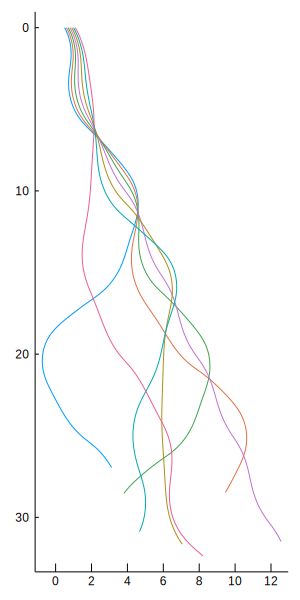

In [17]:
plot_several(t_e1_30)

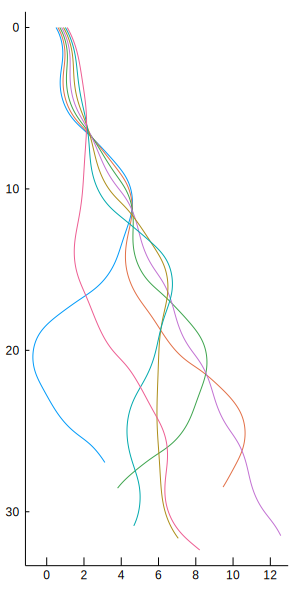

In [18]:
plot_several(t_e1_30)

The same initial contidions but we let the 7 boards travel 60 meters

In [19]:
t_e1_60 = various_sol_generator(7, x_1, y_1, U_1, V_1, 1600, 0.01, 0.1)

7-element Array{Any,1}:
 [0.0 0.5; 0.04 0.52; … ; 54.33353702559121 3.7196967127849345; 54.3621368426055 3.710738122315613]               
 [0.0 0.6; 0.04 0.62; … ; 56.75946721126459 -2.523620845029545; 56.80118078731549 -2.51812429138225]              
 [0.0 0.7; 0.04 0.72; … ; 55.938969099031496 10.63114092857189; 55.967323987389285 10.601056478292541]            
 [0.0 0.8; 0.04 0.8200000000000001; … ; 60.178461771854955 22.42089109931625; 60.20948769910684 22.42851520157835]
 [0.0 0.9; 0.04 0.92; … ; 60.57331420663769 19.58555859012676; 60.60781167318664 19.614275434533145]              
 [0.0 1.0; 0.04 1.02; … ; 61.70363025584667 -8.444561107315394; 61.73554074593806 -8.47341742046345]              
 [0.0 1.1; 0.04 1.12; … ; 60.92042645427245 13.434327078628902; 60.95896791807307 13.425770039756511]             

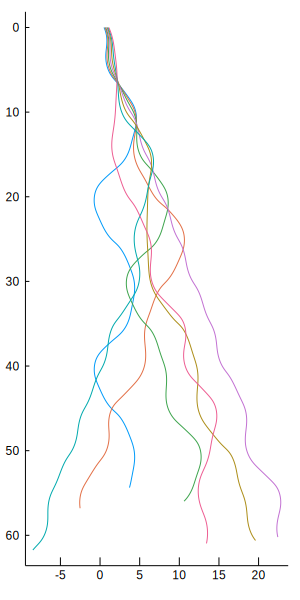

In [20]:
plot_several(t_e1_60)

## Example 2
Initial conditions just spaced $1$mm apart from $0.497$ to $0.503$.

In [21]:
x_1 = 0.0
y_1 = 0.497
U_1 = 4.0
V_1 = 2.0
n = 800
dt = 0.01
t_e2_60 = various_sol_generator(7, x_1, y_1, U_1, V_1, 1600, 0.01, 0.01)

7-element Array{Any,1}:
 [0.0 0.497; 0.04 0.517; … ; 55.873510584162695 -6.185372963107436; 55.913584750919824 -6.211196438888784]            
 [0.0 0.507; 0.04 0.527; … ; 54.45626320240853 3.0932763784649007; 54.48401012940695 3.0749812354532273]              
 [0.0 0.517; 0.04 0.537; … ; 53.971149395658344 3.3453675266175735; 53.99980676776154 3.329927872851987]              
 [0.0 0.527; 0.04 0.547; … ; 56.65523776002899 -9.947986042534316; 56.686799631417244 -9.98292747330527]              
 [0.0 0.537; 0.04 0.557; … ; 57.590343127882015 -14.704993506627373; 57.629085307436355 -14.698447220878718]          
 [0.0 0.547; 0.04 0.5670000000000001; … ; 54.646205964669946 2.084924835956762; 54.690234596537174 2.0993545758021828]
 [0.0 0.5569999999999999; 0.04 0.577; … ; 58.05921594052514 10.340222259661024; 58.090905026333104 10.355318855156886]

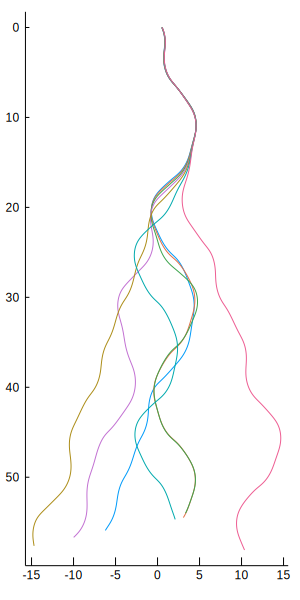

In [22]:
plot_several(t_e2_60)

In [23]:
t_e3_600 = various_sol_generator(1, x_1, y_1, U_1, V_1, 17000, 0.01, 0.01)

1-element Array{Any,1}:
 [0.0 0.497; 0.04 0.517; … ; 589.8131139507678 -33.435908253150394; 589.8444342491445 -33.42636858933261]

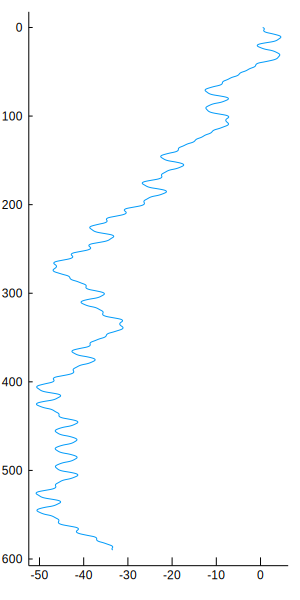

In [24]:
plot_several(t_e3_600)